In [ ]:
import tensorflow as tf 

g1 = tf.Graph()
with g1.as_default():
    v = tf.get_variable('v', shape=[1], initializer=tf.constant_initializer(1.0))

g2 = tf.Graph()
with g2.as_default():
    v = tf.get_variable('v', shape=[1], initializer=tf.constant_initializer(0))

with tf.Session(graph=g1) as sess:
    tf.global_variable_initializer().run()
    with tf.variable_scope("", reuse=True):
        print(sess.run(tf.get_variable('v')))

with tf.Session(graph=g2) as sess:
    tf.global_variable_initializer().run()
    with tf.variable_scope("", reuse=True):
        print(sess.sun(tf.get_variable('v')))

w1 = tf.Variable(tf.random_normal([2, 3], stddev=1, seed=1))
w2 = tf.Variable(tf.random_normal([3, 1], stddev=1, seed=1))
x = tf.constant([[0.7, 0.9]]) # 1x2
a = tf.matmul(x, w1) # 1x3
y = tf.matmul(a, w2) # 1x1

sess = tf.Session()
sess.run(w1.initializer)
sess.run(w2.initializer)
sess.close()

# 定义损失函数
cross_entropy = -tf.reduce_mean( y_ * tf.log(tf.clip_by_value(y, 1e-10, 1.0))) # tf.clip_by_value(v, min, max) 截断操作
# 定义学习率
learning_rate = 0.01
# 定义反向传播算法
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

import tensorflow as tf 
from numpy.random import RandomState

batch_size = 8

w1 = tf.Variable(tf.random_normal([2, 3], stddev=1, seed=1))
w2 = tf.Variable(tf.random_normal([3, 1], stddev=1, seed=1))


'plt' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


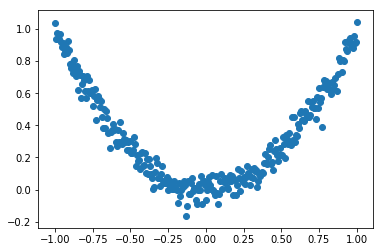

In [38]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
!plt inline

def add_layer(inputs, input_size, output_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([input_size, output_size])) # Variable里面不需要定义数据类型
    bias = tf.Variable(tf.zeros([1, output_size]) + 0.10) # bias维度为[1,outputsize] wx col为output_size, 可广播
    wx_plus_bias = tf.add(tf.matmul(inputs, Weights), bias)
    if activation_function == None:
        return wx_plus_bias
    else:
        ret = activation_function(wx_plus_bias)
        return ret 
    
X = np.linspace(-1,1, 300)[:, np.newaxis].astype(np.float32)
noise = np.random.normal(0, 0.05, X.shape).astype(np.float32)
y = np.square(X) + noise

xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

l1 = add_layer(xs, 1, 10, tf.nn.relu)
l2 = add_layer(l1, 10, 1)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(l2 - y), reduction_indices=[1]))
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init, feed_dict={xs: X, ys: y}) # 运行初始化
    fig = plt.figure() # 创建画布
    ax = fig.add_subplot(1,1,1) # 取得画布指针
    ax.scatter(X, y) # 画散点图
    plt.ion() 
    for i in range(3000):
        sess.run(train, feed_dict={xs: X, ys: y}) # 运行train
        if i % 100 == 0:
#             print(sess.run(loss, feed_dict={xs: X, ys: y}))
            try:
                ax.lines.remove(lines[0]) # 画动态图，去除掉lines的第一个，即前面的图
            except Exception:
                pass
            prediction_value = sess.run(l2, feed_dict={xs:X, ys: y})
            lines = ax.plot(X, prediction_value, 'r-', lw=10)
            plt.pause(0.1) # 画图暂停0.1s
    plt.ioff()
    plt.show() # 只有show的画，程序会暂停，需要加interactive ON， plt.ion()

# 加速神经网络训练

- Stochastic Gradient Descent(SGD)：分批次导入，给NN训练,  
- Momentum更新方法：在原有的w更新基础上加一个常数(惯性），w:=b * m - LearningRate * dx;下坡惯性
- AdaGrad:对学习率进行改进，对差的学习率加惩罚；不好走的路加小鞋子让他更不好走
- RMSProp: Momentum和AdaGrad的结合版本1.0
- Adam: AdaGrad和Momentum的结合版本2.0

## Adam 
### (最佳，一个下坡，一双破鞋)
$ m = b_1 * m + (1 - b_1) * dx $  --> Momentum # 基于上一步的m  

$ v = b_2 * v + (1 - b_2) * dx^2 $ --> AdaGrad  

$ W += -LearningRate * \frac{m}{\sqrt{v}} $  


# Optimizer

